# Communicating Data Findings with FordGo Bike system Data
## (January 2018 - December 2018)

## by Saikiran Bikumalla


---
---



## Introduction

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> See the data [here](https://www.fordgobike.com/system-data)

## Preliminary Wrangling

* I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data 
* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
* Multiple data files will need to be joined together if a full year’s coverage is desired.
* The features included in the dataset : 
Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob
%matplotlib inline

sns.set_style('darkgrid')

I have concatenated all the monthly wise data (january 2018 - december 2018) into a single file using the below code and saved it as `fordgo_master.csv`

In [12]:
files = glob.glob("datasets/*.csv")
df = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
df.to_csv('datasets/fordgo_master.csv',index=False)

In [13]:
# import the dataset
df = pd.read_csv('datasets/fordgo_master.csv')
# view the first five rows of dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,813,Customer,No
1,60644,2018-08-31 21:40:01.7490,2018-09-01 14:30:46.4470,50.0,2nd St at Townsend St,37.780526,-122.390288,50.0,2nd St at Townsend St,37.780526,-122.390288,1964,Subscriber,No
2,57922,2018-08-31 20:04:28.1630,2018-09-01 12:09:50.8240,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,535,Customer,No
3,82573,2018-08-31 13:07:14.9020,2018-09-01 12:03:28.2600,19.0,Post St at Kearny St,37.788975,-122.403452,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,3080,Customer,No
4,57677,2018-08-31 19:48:45.1980,2018-09-01 11:50:03.1560,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,132,Customer,No


In [14]:
# view the number of rows and columns in the dataset
df.shape

(1863721, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


## Cleaning

In [16]:
# do some data cleaning : drop nan , remove some insignificant features like 
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),3.0,Powell St BART Station (Market St at 4th St),813,Customer,No
1,60644,2018-08-31 21:40:01.7490,2018-09-01 14:30:46.4470,50.0,2nd St at Townsend St,50.0,2nd St at Townsend St,1964,Subscriber,No
2,57922,2018-08-31 20:04:28.1630,2018-09-01 12:09:50.8240,17.0,Embarcadero BART Station (Beale St at Market St),30.0,San Francisco Caltrain (Townsend St at 4th St),535,Customer,No
3,82573,2018-08-31 13:07:14.9020,2018-09-01 12:03:28.2600,19.0,Post St at Kearny St,34.0,Father Alfred E Boeddeker Park,3080,Customer,No
4,57677,2018-08-31 19:48:45.1980,2018-09-01 11:50:03.1560,3.0,Powell St BART Station (Market St at 4th St),3.0,Powell St BART Station (Market St at 4th St),132,Customer,No


In [17]:
# test
df.shape

(1863721, 10)

In [18]:
# code
# changing start_time and end_time to datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [19]:
# changing user_type and bike_share_for_all_trip to category dtypes
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [20]:
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)

In [21]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   end_station_id           object        
 6   end_station_name         object        
 7   bike_id                  object        
 8   user_type                category      
 9   bike_share_for_all_trip  category      
dtypes: category(2), datetime64[ns](2), int64(1), object(5)
memory usage: 117.3+ MB


In [37]:
# lets add some more columns which we might use for analysis
# start month (January - December)
df['start_month'] = df['start_time'].dt.strftime('%B')

# start month number 
df['start_month_num'] = df['start_time'].dt.month.astype(int)

# start week day 
df['start_weekday'] = df['start_time'].dt.strftime('%a')

# start hour on a day
df['start_hour']  = df['start_time'].dt.hour

In [38]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,start_month,start_month_num,start_weekday,start_hour
0,69465,2018-08-31 19:18:08.613,2018-09-01 14:35:54.064,3.0,Powell St BART Station (Market St at 4th St),3.0,Powell St BART Station (Market St at 4th St),813,Customer,No,August,8,Fri,19
1,60644,2018-08-31 21:40:01.749,2018-09-01 14:30:46.447,50.0,2nd St at Townsend St,50.0,2nd St at Townsend St,1964,Subscriber,No,August,8,Fri,21
2,57922,2018-08-31 20:04:28.163,2018-09-01 12:09:50.824,17.0,Embarcadero BART Station (Beale St at Market St),30.0,San Francisco Caltrain (Townsend St at 4th St),535,Customer,No,August,8,Fri,20
3,82573,2018-08-31 13:07:14.902,2018-09-01 12:03:28.260,19.0,Post St at Kearny St,34.0,Father Alfred E Boeddeker Park,3080,Customer,No,August,8,Fri,13
4,57677,2018-08-31 19:48:45.198,2018-09-01 11:50:03.156,3.0,Powell St BART Station (Market St at 4th St),3.0,Powell St BART Station (Market St at 4th St),132,Customer,No,August,8,Fri,19


In [39]:
df.shape

(1863721, 14)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   end_station_id           object        
 6   end_station_name         object        
 7   bike_id                  object        
 8   user_type                category      
 9   bike_share_for_all_trip  category      
 10  start_month              object        
 11  start_month_num          int64         
 12  start_weekday            object        
 13  start_hour               int64         
dtypes: category(2), datetime64[ns](2), int64(3), object(7)
memory usage: 174.2+ MB


In [52]:
df.describe()

,duration_sec,start_month_num,start_hour
count,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,6.928460e+00,1.351437e+01
std,2.370379e+03,3.118673e+00,4.742223e+00
min,6.100000e+01,1.000000e+00,0.000000e+00
25%,3.500000e+02,5.000000e+00,9.000000e+00
50%,5.560000e+02,7.000000e+00,1.400000e+01
75%,8.720000e+02,1.000000e+01,1.700000e+01
max,8.636600e+04,1.200000e+01,2.300000e+01


### What is the structure of your dataset?

> The dataset contains 1863721 rows and 14 columns. I have added 4 columns of interest (start_month,start_month_num, start_weekday and start_hour )

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are duration_sec, user_type and features that include details about start and end of ride. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time , user_type and duration_sec will help me  gather more information from them and investigate the features of my interest.

----

## Univariate Exploration


### 1.  Average Trip duration

In [53]:
df.duration_sec.describe()

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

Text(0.5, 1.0, 'Ford Gobike Durations')

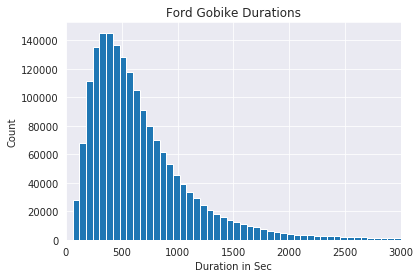

In [63]:
# lets plot the distribution of the trip duration
# since data is numeric, histogram is the best plot

bin_edges = np.arange(0,df['duration_sec'].max() + 60 , 60)
plt.hist(data=df,x = 'duration_sec',bins = bin_edges, color=base_color)
plt.xlabel('Duration in Sec')
plt.xlim(0,3000)
plt.ylabel('Count')
plt.title('Ford Gobike Durations')

**Observation**:
- It is right skewed with a long tail. Lets add logarithmic transformation on x-axis. 
- It is really difficult to look at the plot, i have to set bin size to 60, so lets convert x-axis from seconds to min 

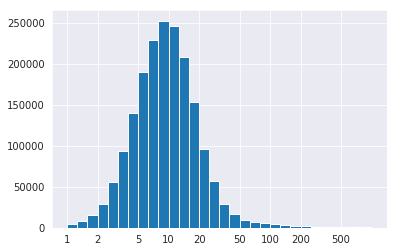

In [64]:
# convert second to minutes
df['duration_min'] = df['duration_sec']/60

# compute bins for logarithmic axis
bin_edges = 10**np.arange(0,3+0.1,0.1)
ticks = [1,2,5,10,20,50,100,200,500]
labels = ['{}'.format(v) for v in ticks]

plt.hist(df.duration_min, bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks,labels);

In [65]:
df.duration_min.describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration_min, dtype: float64

**Observation**:
- The average trip rate is just under 14 minutes and 75% of the trips duration fall under 14 minutes. From the it's evident that the popular duration is in the range of 5-20 min, which means that the riders are taking short rides.

### 2. Monthly usage of Ford Gobike

In [40]:
# removing the rainbow colors and setting one base color
base_color = sns.color_palette()[0]

# Lets look the variable descriptive stats
df.start_month.describe()

count     1863721
unique         12
top       October
freq       201458
Name: start_month, dtype: object

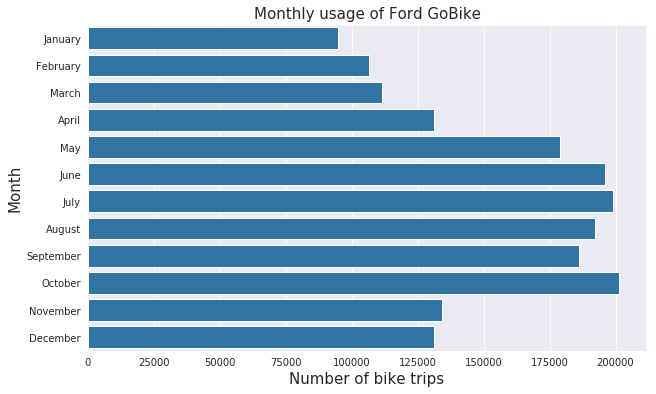

In [49]:
# Monthly usage of ford gobike 
plt.figure(figsize=[10,6])
order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(data = df, y='start_month',color=base_color,order = order_months);
plt.xlabel('Number of bike trips',fontsize = 15)
plt.ylabel('Month',fontsize = 15)
plt.title('Monthly usage of Ford GoBike',fontsize = 15);

#### Observation:
- The summer months and mid Autumn are the most popular times to use the Ford Gobike sharing. October is the most popular month and June, July fall next. August and september aren't far behind.

### 3. Week day Usage of Ford Gobike

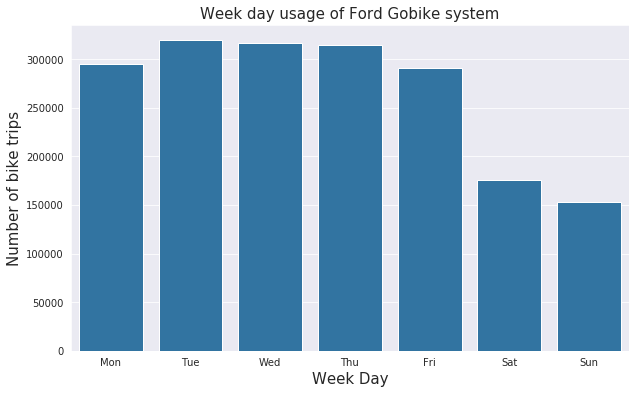

In [48]:
# week day usage of ford gobike
plt.figure(figsize=[10,6])
order_weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data = df, x='start_weekday',color = base_color, order = order_weekdays);
plt.ylabel('Number of bike trips',fontsize = 15)
plt.xlabel('Week Day',fontsize = 15)
plt.title('Week day usage of Ford Gobike system',fontsize = 15);

#### Observation:
- Surprisingly the least popular days for using Ford Gobike system are weekends and the most popular days are weekday with very much difference. From this we could analyse that all the users who are using Ford Gobike are using it for their commuting purposes on weekdays

### 4. Hourly usage of Ford Gobike

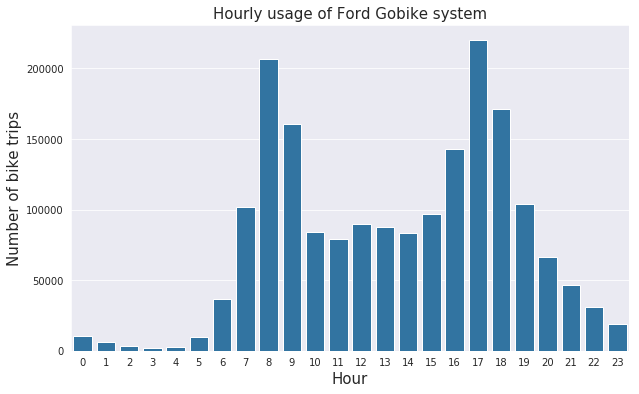

In [47]:
# hourly usage of ford gobike
plt.figure(figsize=[10,6])
sns.countplot(data = df, x='start_hour',color = base_color);
plt.ylabel('Number of bike trips',fontsize = 15)
plt.xlabel('Hour',fontsize = 15)
plt.title('Hourly usage of Ford Gobike system',fontsize = 15);

#### Observation:
- The distribution is bimodal and we can see the most popular times of ford gobike system usage are morning 8-9am and evening 4-6pm. This futher strengthens the observation made that these bikes are being used for commuting purposes. 

### 5. Exploring different user types

In [66]:
# viewing the different types of users
df.user_type.unique()

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

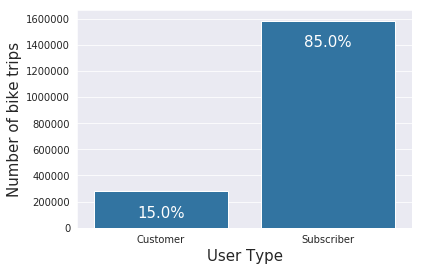

In [89]:
# plotting the number of different types of users

user_counts = df.user_type.value_counts()
user_order = user_counts.index

for i in range(user_counts.shape[0]):
    count = user_counts[i]
    percent = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(i,count-200000,percent,ha='center',color='white',fontsize=15)

sns.countplot(data = df , x = 'user_type', color = base_color);
plt.xlabel('User Type',fontsize=15)
plt.ylabel('Number of bike trips',fontsize=15);

**Observation**:
- Most number of bike trips are taken by user type who are subscribers. Customers relatively take very less amount. Number of subscribers who take ride constitute 85% whereas customers constitute 15%. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase. The duration of the bike ride (which was in seconds)  gave me a little trouble since there were some outliers I didn't anticipate and even the data scaling had to be done.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There weren't any unusual distributions. The distribution of duration suggested that the ride durations are popular for short periods. I had to compute duration in minutes to plot a scaled distribution of ride durations. From Weekdays plot it is evident that weekdays are most popular producing an observation of "bikes are used for commuting purpose" which is even strengthened by the hourly usage plot with most popular times being morning 8-9am and evening 5-6pm, which are the start and end times of office hours.

----

## Bivariate Exploration


### 1. User type vs Monthly usage

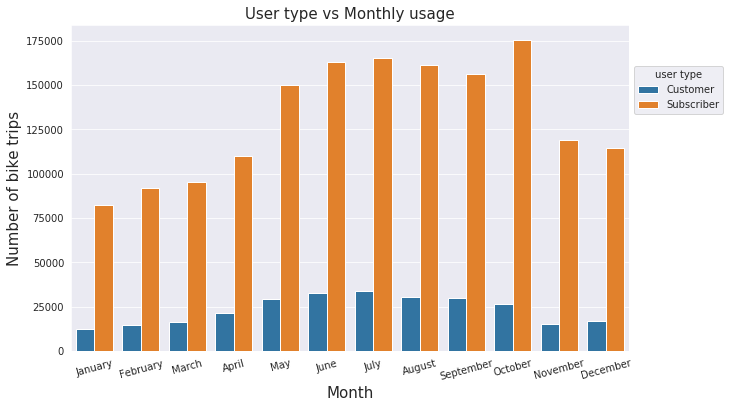

In [101]:
# cutsomer usage by month and subscriber usage by month
plt.figure(figsize=[10,6])

order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# both are categorical variables, hence clustered bar chart 

sns.countplot(data=df, x='start_month',hue ='user_type',order = order_months);
plt.xticks(rotation = 15);
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Number of bike trips',fontsize=15)
plt.title('User type vs Monthly usage',fontsize=15);
# legend to right
plt.legend(title = 'user type',loc = 6, bbox_to_anchor = (1.0, 0.8));

**Observation**:
- Winter months(Jan,feb) are the worst for the bike sharing system for both groups what can be determined by the harsher weather. 
- Customers: demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who visit the Bay Area. 
- Subscribers: the highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute

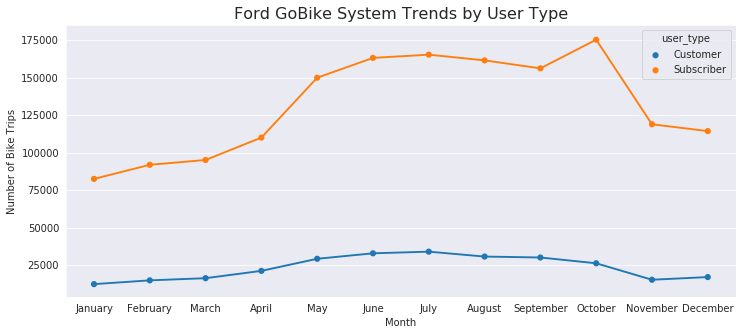

In [117]:
# we can even use pointplot

plt.figure(figsize=(12, 5))

df_user_month = df.groupby(['start_month', 'user_type']).size().reset_index()
order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

ax = sns.pointplot(data=df_user_month, x='start_month', y=0, hue = 'user_type', scale=.7, order = order_months);

plt.title('Ford GoBike System Trends by User Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips');

**Observation**:
- The point plot above is an excellent visual showing a sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase from may to july (summer). Subscribers - there is steadily high usage between may and october with a sharp peek in october.

### 2. User type vs Week day usage

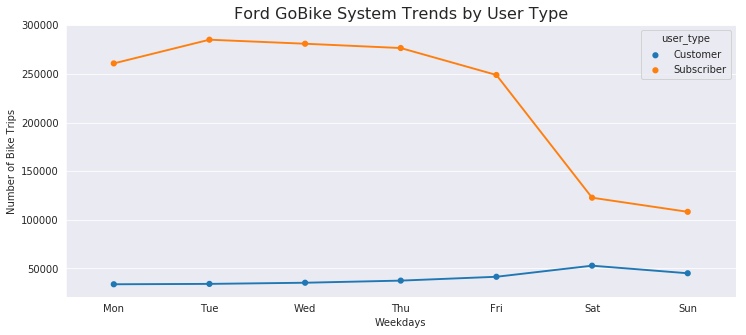

In [115]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
# qualitative vs qualitative variable, point plot or clustered bar charts can be used

plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_user_week, x='start_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', fontsize=16)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');

**Observation**: 
- The point plot above showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.
- By the above graph we may think that subscribers are those who use bikes for daily commutes and customers are those who may be tourists or ocassional riders to the bay area

### 3. Effect of month on trip duration

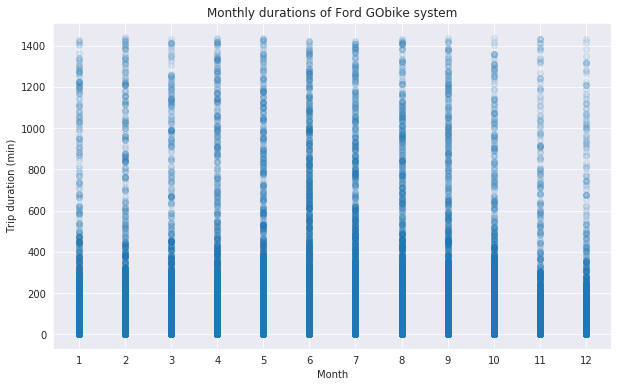

In [121]:
# We can check the trip duration changes over each month.
# two quantitative variables, scatter plot can be used

plt.figure(figsize=[10,6])
plt.scatter(data=df , x='start_month_num', y='duration_min',alpha=0.1)
plt.xlabel('Month')
plt.ylabel('Trip duration (min)')
plt.title('Monthly durations of Ford GObike system')
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(ticks,ticks);

**Observation**: 
- June to august months(6-8) have most high durations. Other months don't have that significant difference between them.
- let's explore seasonal effect on trip duration

### 4. Seasonal effect on trip duration

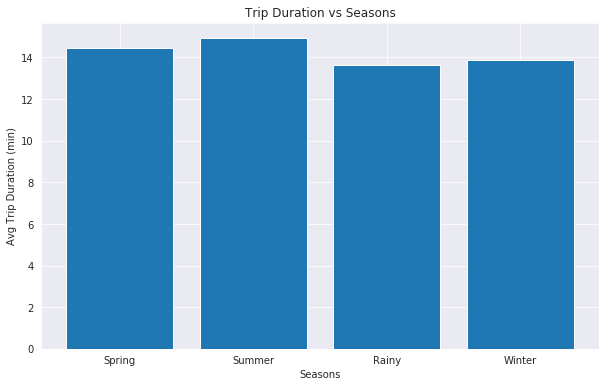

In [126]:
# collect the seasonal data 

spring_mean = df.query('start_month_num in ["3" , "4" , "5"]' )['duration_min'].mean ()
summer_mean = df.query('start_month_num in ["6" , "7" , "8"] ')['duration_min'].mean()
rainy_mean = df.query('start_month_num in ["9" , "10" , "11"] ')['duration_min'].mean()
winter_mean = df.query('start_month_num in ["12" , "1" , "2"]' )['duration_min'].mean()

# one qualitative and other numeric varibale
# here i am using adaptation of univariate barplot to get a bivariate plot 

plt.figure(figsize=[10,6])
plt.bar(['Spring','Summer','Rainy','Winter'],[spring_mean , summer_mean , rainy_mean , winter_mean] )
plt.title('Trip Duration vs Seasons')
plt.xlabel('Seasons')
plt.ylabel('Avg Trip Duration (min)');

#### Observation:
- As expected, summer has the longest trip duration , with average trip duration above 14 mins.
- But there is no significant difference of trip duration in terms of four seasons. It is probably because the weather in San Francisco bay area does not change that much.


### 5. User type vs trip duration

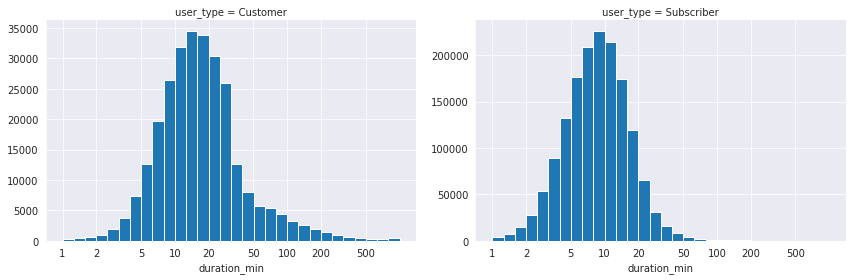

In [131]:
# user type(qualitative variable) and duration is quantitative variable
# we can use adaptation of bar plot even here
# but i am using faceting

# compute bins for logarithmic axis
bin_edges = 10**np.arange(0,3+0.1,0.1)
ticks = [1,2,5,10,20,50,100,200,500]
labels = ['{}'.format(v) for v in ticks]

g = sns.FacetGrid(data=df , col = 'user_type',height=4,aspect =1.5,sharey=False)
g.map(plt.hist,'duration_min', bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks,labels);

**Observation**:
- The plots above show the ride duration in minutes on a logarithmic scaling (Note: y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). 
- Customer typically have trip durations are longer (10 to 30 minutes according to above plot) than for subscribers (5 to 15 minutes according to above plot).
- Even we can notice that number of customers taking long duration rides are less than number of subscribers, but as the number of subscribers are more and customers are less in the dataset, the best metric to compare this aspect would be proportions and not counts.
- This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customer typically have trip durations are longer (10 to 30 minutes according to above plot) than for subscribers (5 to 15 minutes according to above plot).Even we can notice that number of customers taking long duration rides are less than number of subscribers, but as the number of subscribers are more and customers are less in the dataset, the best metric to compare this aspect would be proportions and not counts.
> Weather(Seasonal or monthly) effect on trip duartion has been studied and it hasn't that significant effect.

----

## Multivariate Exploration


## 1. Does user type lead to lower trip duration per month?

/home/bikumalla/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


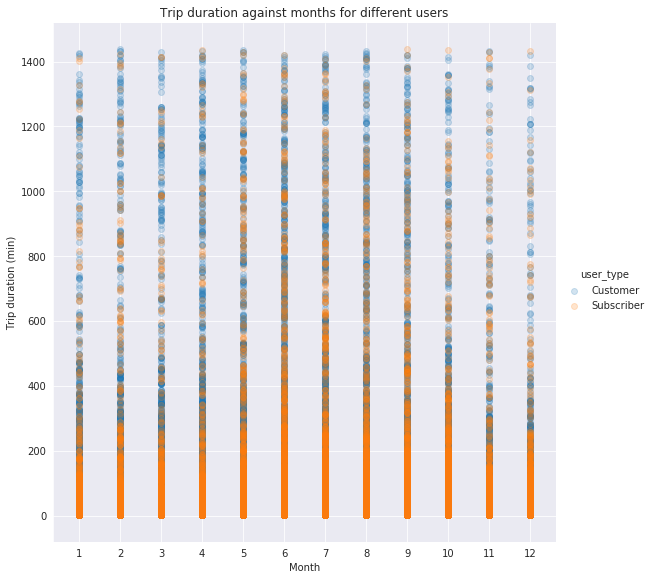

In [133]:
# two numeric variables month_num and duration_min and one categorical variable user_type
# we can use color encoded scatter plot

g = sns.FacetGrid(data = df , hue = 'user_type' , size = 8)
g.map(plt.scatter , 'start_month_num' , 'duration_min' , alpha =0.2)
g.add_legend()
plt.title('Trip duration against months for different users')
plt.xlabel('Month')
plt.ylabel('Trip duration (min)')
ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(ticks,ticks);

**Observation**: 
- From the above scatter plot it is clearly evident that number of customers are less than subscribers (data color encodings)
- In every month the number of people who take less duration rides are mostly subscribers and people who take long duration rides are customers.
- In month of may, june and july the amount of subscribers who take long duration rides are more(increased) when compared to other months

### 2. Variation of average trip duration in weekdays between customers and subscribers

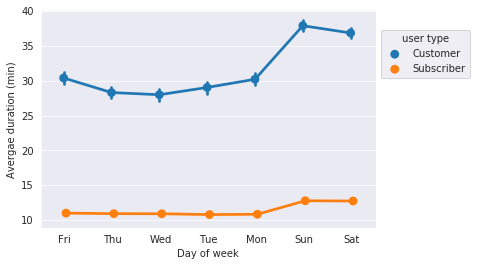

In [145]:
# we have two qualitative variables and one quantitave variable
# lets create a point plot for Average trip duration in weekdays
# then encode the user types with color encoding

sns.pointplot(data = df,x='start_weekday',y='duration_min',hue='user_type',dodge=True)
plt.xlabel('Day of week')
plt.ylabel('Avergae duration (min)')
plt.legend(title = 'user type',loc = 6, bbox_to_anchor = (1.0, 0.8));

**Observation**:
- It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

### 3. Monthwise analysis of trip duration of each weekday for different user types 

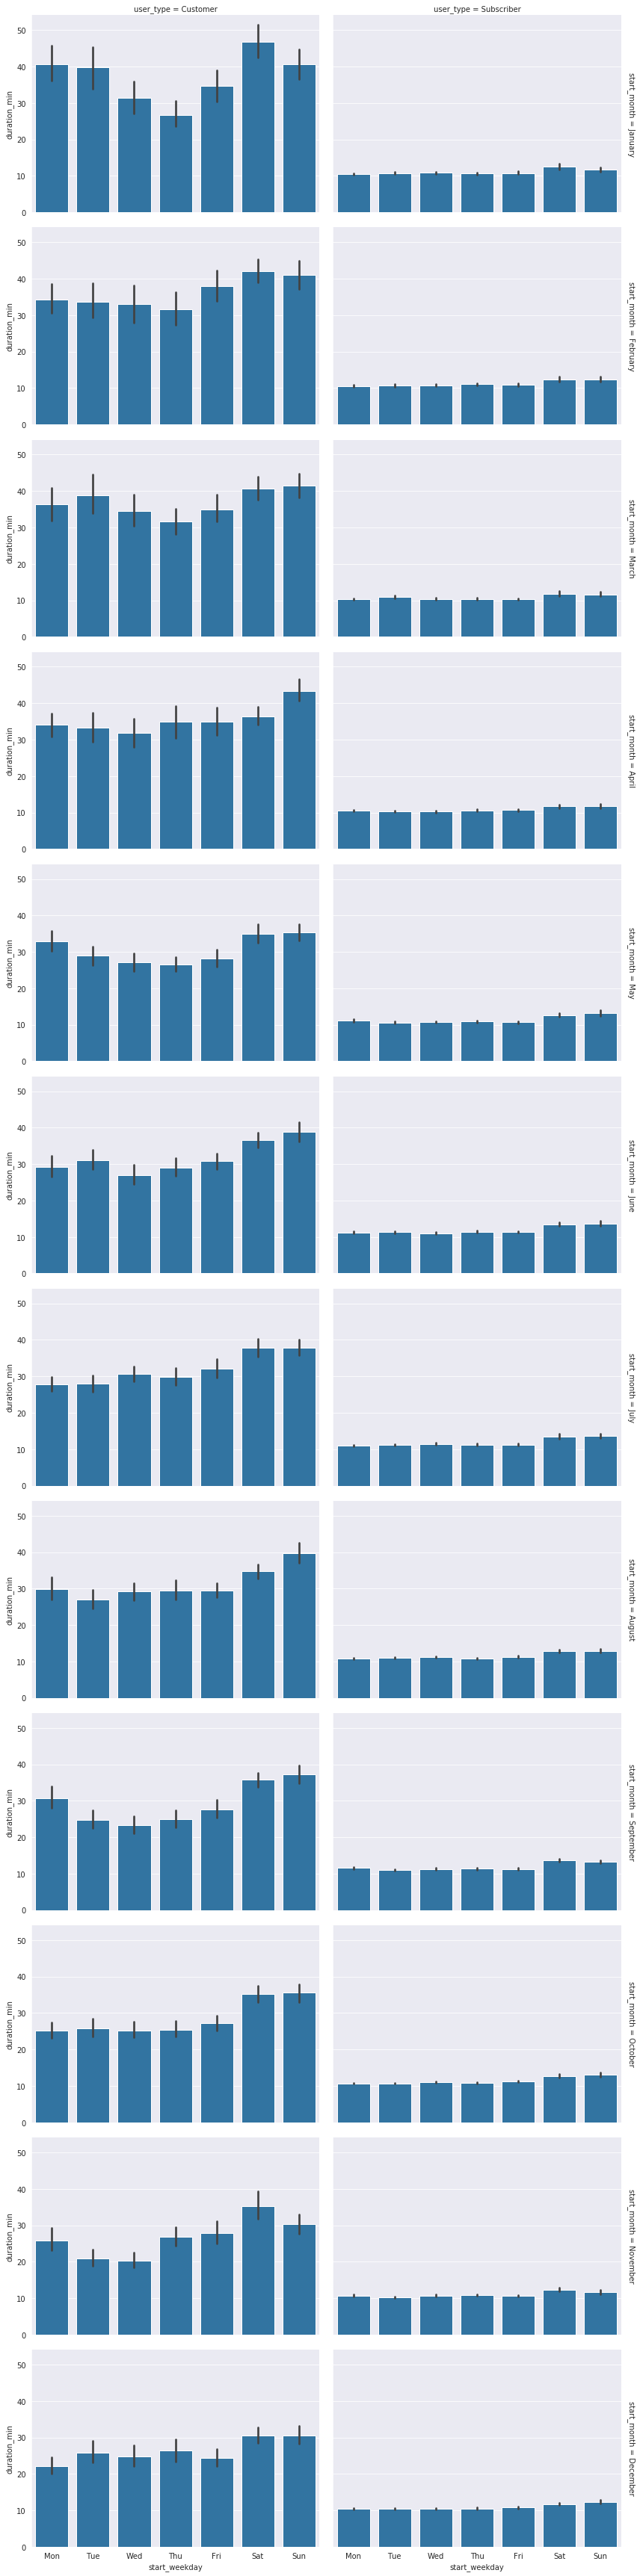

In [144]:
# create order of lists
order_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
order_weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# lets use faceting in two directions
g = sns.FacetGrid(data = df, row ='start_month' , col = 'user_type',row_order = order_months,
                  margin_titles = True,height = 4,aspect = 1.5)

# create a adapted bar plot for week days and avg trip duration
g = g.map(sns.barplot,'start_weekday','duration_min',color=base_color,order = order_weekdays)


**Observation**:
- from above plots of weekday against duration in min for every month for different users
- For subscribers: The average duration of ride(min) in every month is always highest on weekends and there is no significant difference in avergae duration of ride change on weekdays (mon-fri).
- For customers: the data keeps on changing from month to month, but mostly the average duration of ride in every month is greater on weekends.
- From above plots it is evident that, for any type of user the average duration of ride is highest on weekends in every month 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration of data strengthened some of the patterns discovered in the bivariate exploration and univariate exploration, the relationship between multiple variables plotted is visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours(8-9am and 5-6pm) Monday through Friday, indicating the use is primarily for work commute. The more flexible and relaxing pattern of customer usage shows that they're taking advantage of the bike sharing system differently from the subscribers, heavily over weekends for city tour or leisure purpose probably.

### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and make quite sense when looked combinedly, there's no big surprise observed. 